<a href="https://colab.research.google.com/github/2403a52233-sudo/NLP_/blob/main/NLP_LAB_4_2403A52233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


In [13]:
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
movie_reivews = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='warn')
movie_reivews.head()

/tmp/ipython-input-2848323701.py:1: ParserWarning: Skipping line 15810: unexpected end of data

  movie_reivews = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='warn')


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
positive_reviews = movie_reivews[movie_reivews['sentiment'] == 'positive']['review']
negative_reviews = movie_reivews[movie_reivews['sentiment'] == 'negative']['review']

print("Positive reviews:", len(positive_reviews))
print("Negative reviews:", len(negative_reviews))


Positive reviews: 2362
Negative reviews: 2399


In [16]:
vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    lowercase=True,
    max_features=5000
)


In [17]:
tfidf_pos = vectorizer.fit_transform(positive_reviews)
pos_terms = vectorizer.get_feature_names_out()

pos_scores = np.mean(tfidf_pos.toarray(), axis=0)

pos_df = pd.DataFrame({
    'Term': pos_terms,
    'TF-IDF Score': pos_scores
}).sort_values(by='TF-IDF Score', ascending=False)

top_pos = pos_df.head(15)
top_pos


,Term,TF-IDF Score
541,br,0.106197
2955,movie,0.053136
1741,film,0.048986
3158,one,0.031990
2613,like,0.024393
1959,good,0.023949
1987,great,0.022268
3916,see,0.021203
4272,story,0.021028
4871,well,0.020379


In [18]:
tfidf_neg = vectorizer.fit_transform(negative_reviews)
neg_terms = vectorizer.get_feature_names_out()

neg_scores = np.mean(tfidf_neg.toarray(), axis=0)

neg_df = pd.DataFrame({
    'Term': neg_terms,
    'TF-IDF Score': neg_scores
}).sort_values(by='TF-IDF Score', ascending=False)

top_neg = neg_df.head(15)
top_neg


,Term,TF-IDF Score
575,br,0.114327
2944,movie,0.059567
1723,film,0.046863
3121,one,0.031153
2609,like,0.028570
386,bad,0.026220
1945,good,0.024255
1549,even,0.022835
4959,would,0.021853
3572,really,0.020369


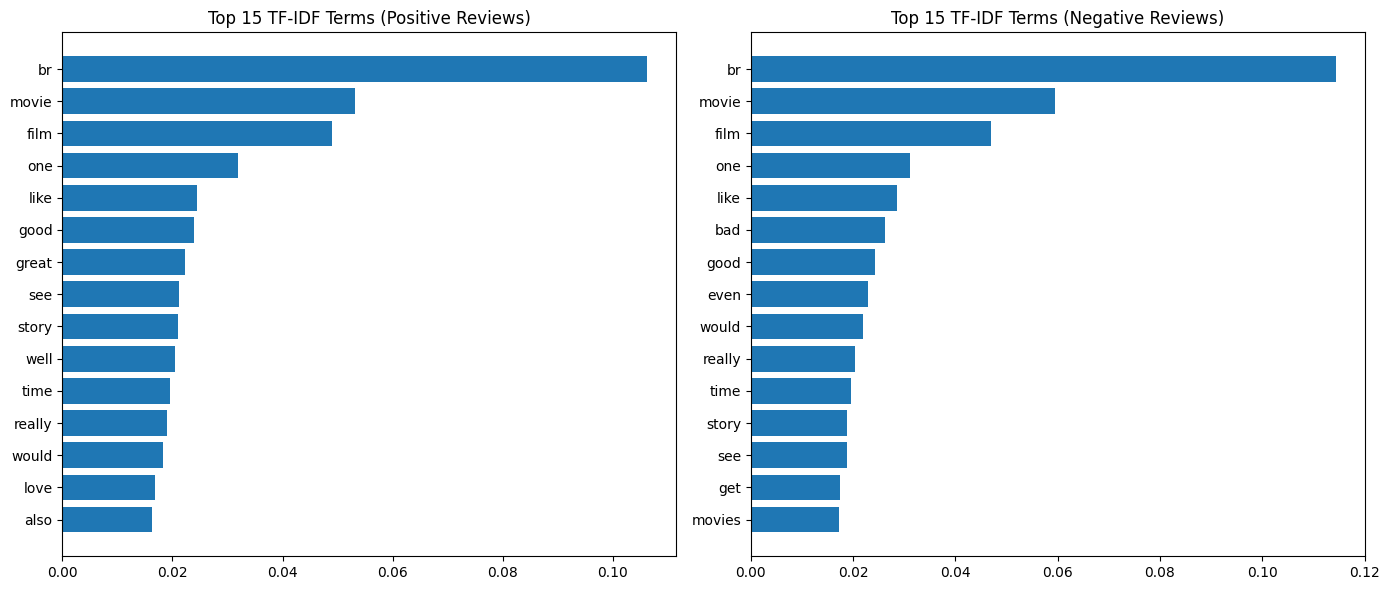

In [19]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.barh(top_pos['Term'], top_pos['TF-IDF Score'])
plt.title("Top 15 TF-IDF Terms (Positive Reviews)")
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.barh(top_neg['Term'], top_neg['TF-IDF Score'])
plt.title("Top 15 TF-IDF Terms (Negative Reviews)")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
